/home/juyeong/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


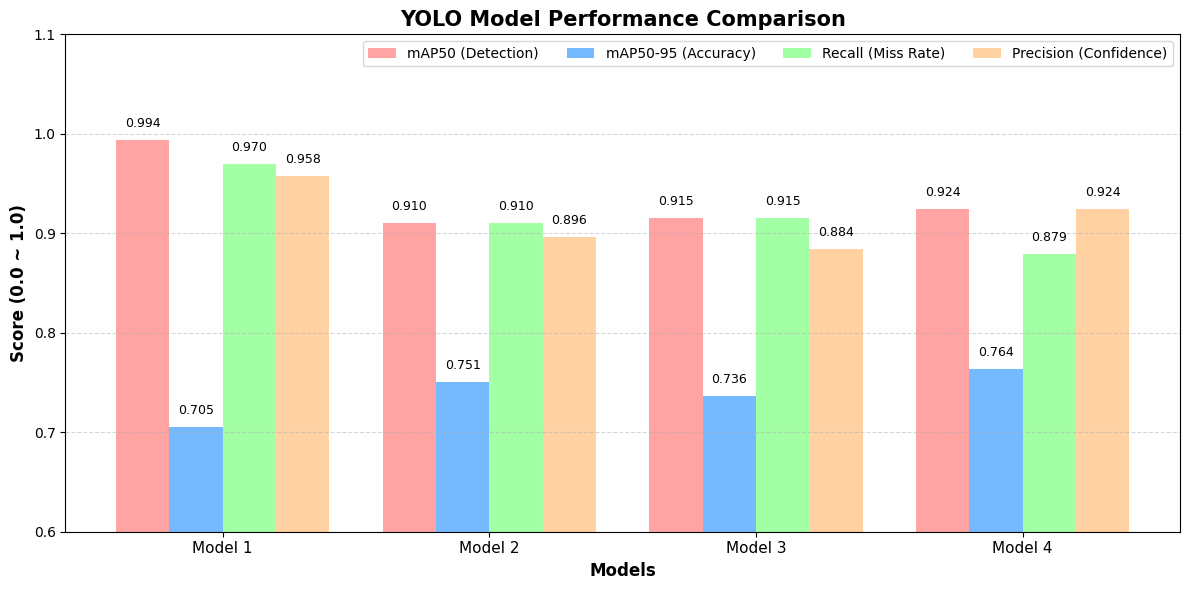

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 (실제 파일 경로에 맞게 수정 필요)
# 각 CSV의 마지막 행(가장 학습이 잘 된 상태) 데이터를 가져옴
data = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'mAP50': [0.994, 0.910, 0.915, 0.924],      # metrics/mAP50(B)
    'mAP50-95': [0.705, 0.751, 0.736, 0.764],   # metrics/mAP50-95(B)
    'Recall': [0.970, 0.910, 0.915, 0.879],     # metrics/recall(B)
    'Precision': [0.958, 0.896, 0.884, 0.924]   # metrics/precision(B)
}

df = pd.DataFrame(data)

# 2. 그래프 스타일 설정
plt.figure(figsize=(12, 6))
# 한글 폰트 설정 (필요 시 주석 해제 및 시스템 폰트 적용)
# plt.rc('font', family='Malgun Gothic') 

# 바 차트 설정
bar_width = 0.2
index = np.arange(len(df['Model']))

# 3. 막대 그래프 그리기 (4가지 지표 비교)
p1 = plt.bar(index - 1.5*bar_width, df['mAP50'], bar_width, label='mAP50 (Detection)', color='#FF9999', alpha=0.9)
p2 = plt.bar(index - 0.5*bar_width, df['mAP50-95'], bar_width, label='mAP50-95 (Accuracy)', color='#66B2FF', alpha=0.9)
p3 = plt.bar(index + 0.5*bar_width, df['Recall'], bar_width, label='Recall (Miss Rate)', color='#99FF99', alpha=0.9)
p4 = plt.bar(index + 1.5*bar_width, df['Precision'], bar_width, label='Precision (Confidence)', color='#FFCC99', alpha=0.9)

# 4. 차트 꾸미기
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Score (0.0 ~ 1.0)', fontsize=12, fontweight='bold')
plt.title('YOLO Model Performance Comparison', fontsize=15, fontweight='bold')
plt.xticks(index, df['Model'], fontsize=11)
plt.ylim(0.6, 1.1)  # 차이 잘 보이게 Y축 조정
plt.legend(loc='upper right', ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시 함수 (막대 위에 숫자 적기)
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9, rotation=0)

add_labels(p1)
add_labels(p2)
add_labels(p3)
add_labels(p4)

plt.tight_layout()
plt.show()

/home/juyeong/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Saved comparison_mAP50.png


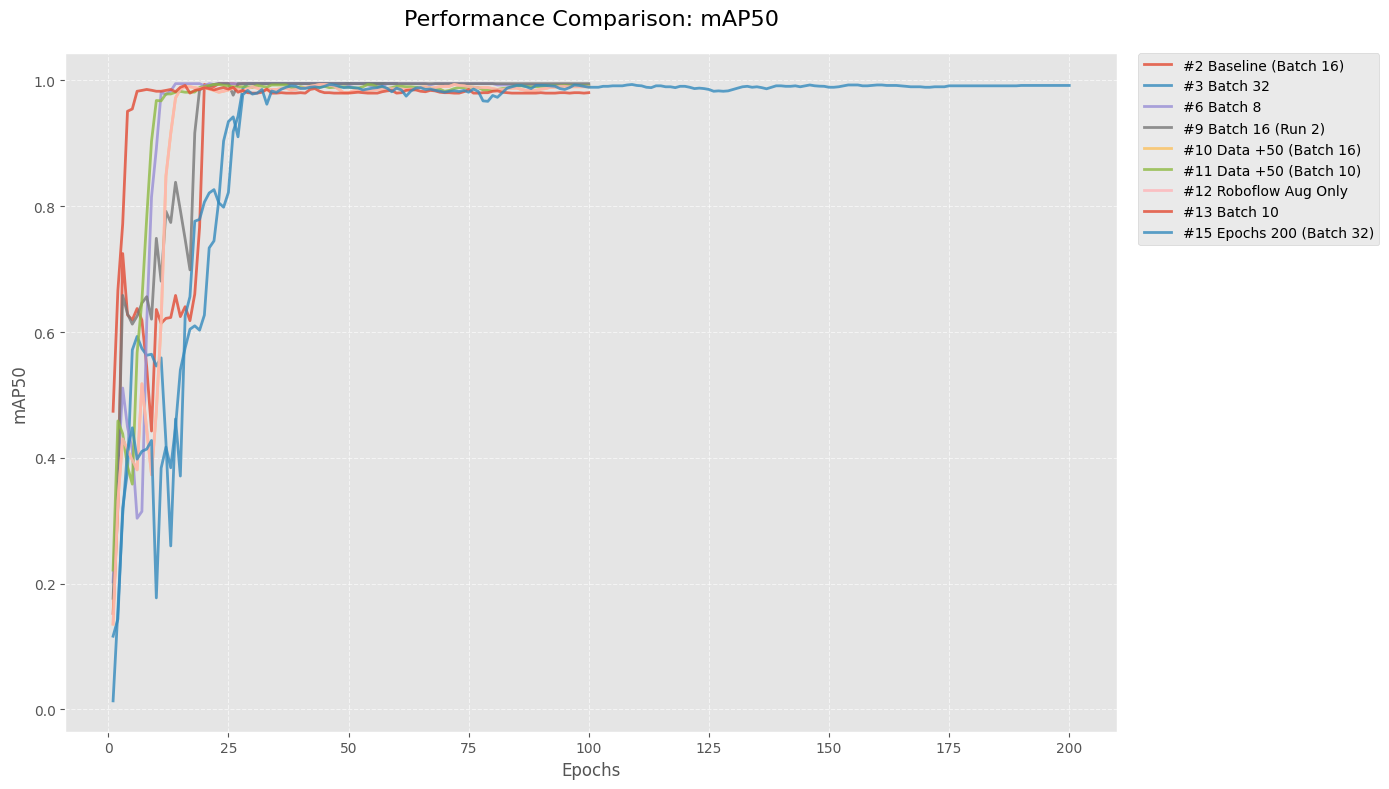

Saved comparison_mAP50-95.png


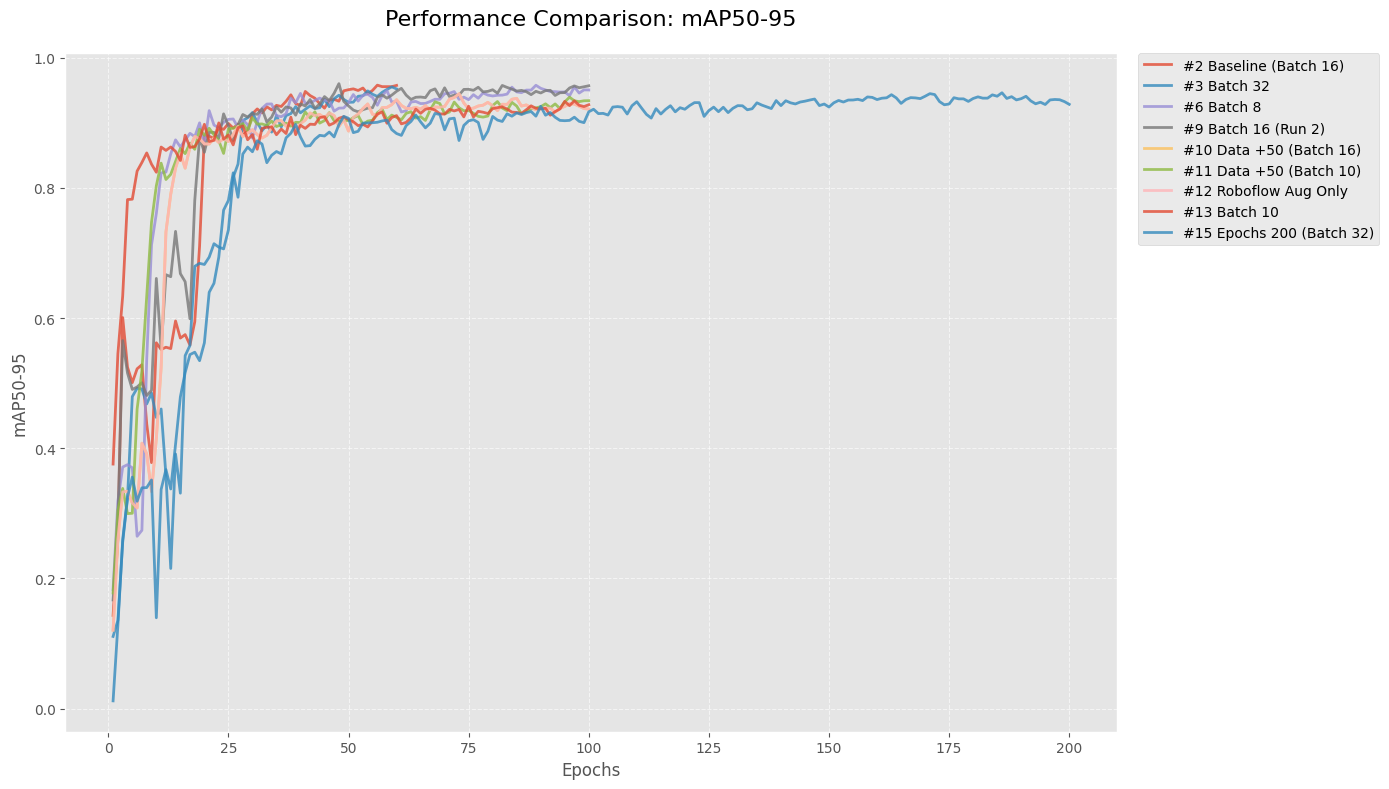

Saved comparison_Recall.png


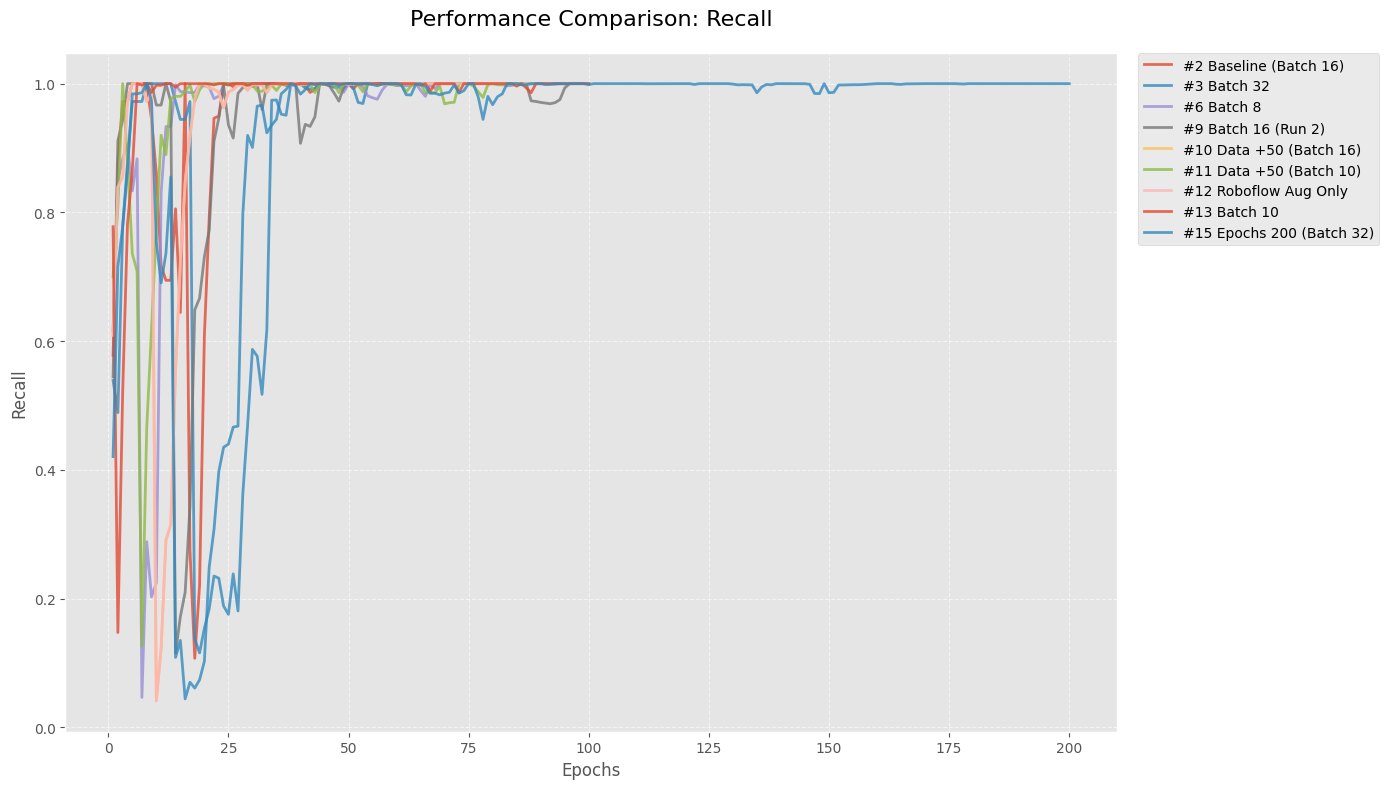

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 스타일 설정
plt.style.use('ggplot')

# 실험 인덱스 및 설정 매핑 (PDF 내용 기반)
experiments = {
    2: "Baseline (Batch 16)",
    3: "Batch 32",
    6: "Batch 8",
    9: "Batch 16 (Run 2)",
    10: "Data +50 (Batch 16)",
    11: "Data +50 (Batch 10)",
    12: "Roboflow Aug Only",
    13: "Batch 10",
    15: "Epochs 200 (Batch 32)"
}

# 비교할 지표 설정 (csv 컬럼명: 표시할 이름)
metrics = {
    "metrics/mAP50(B)": "mAP50",
    "metrics/mAP50-95(B)": "mAP50-95",
    "metrics/recall(B)": "Recall"
}

# 데이터 로드용 경로 설정
base_path = "csv_data"  # csv 파일이 위치한 폴더명

# 그래프 그리기
for metric_col, metric_name in metrics.items():
    plt.figure(figsize=(14, 8))
    
    # 각 실험 결과 로드 및 플롯
    for idx, label in experiments.items():
        file_path = os.path.join(base_path, f"result{idx}.csv")
        
        if os.path.exists(file_path):
            try:
                # 데이터 읽기
                df = pd.read_csv(file_path)
                
                # 컬럼명 공백 제거
                df.columns = [c.strip() for c in df.columns]
                
                # 해당 지표가 있는지 확인 후 플롯
                if metric_col in df.columns:
                    plt.plot(df['epoch'], df[metric_col], label=f"#{idx} {label}", linewidth=2, alpha=0.8)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
            
    # 그래프 꾸미기
    plt.title(f"Performance Comparison: {metric_name}", fontsize=16, pad=20)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # 범례 우측 배치
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # 저장
    save_name = f"comparison_{metric_name}.png"
    plt.savefig(save_name, dpi=300)
    print(f"Saved {save_name}")
    plt.show()

/tmp/ipykernel_226734/3253626199.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipykernel_226734/3253626199.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


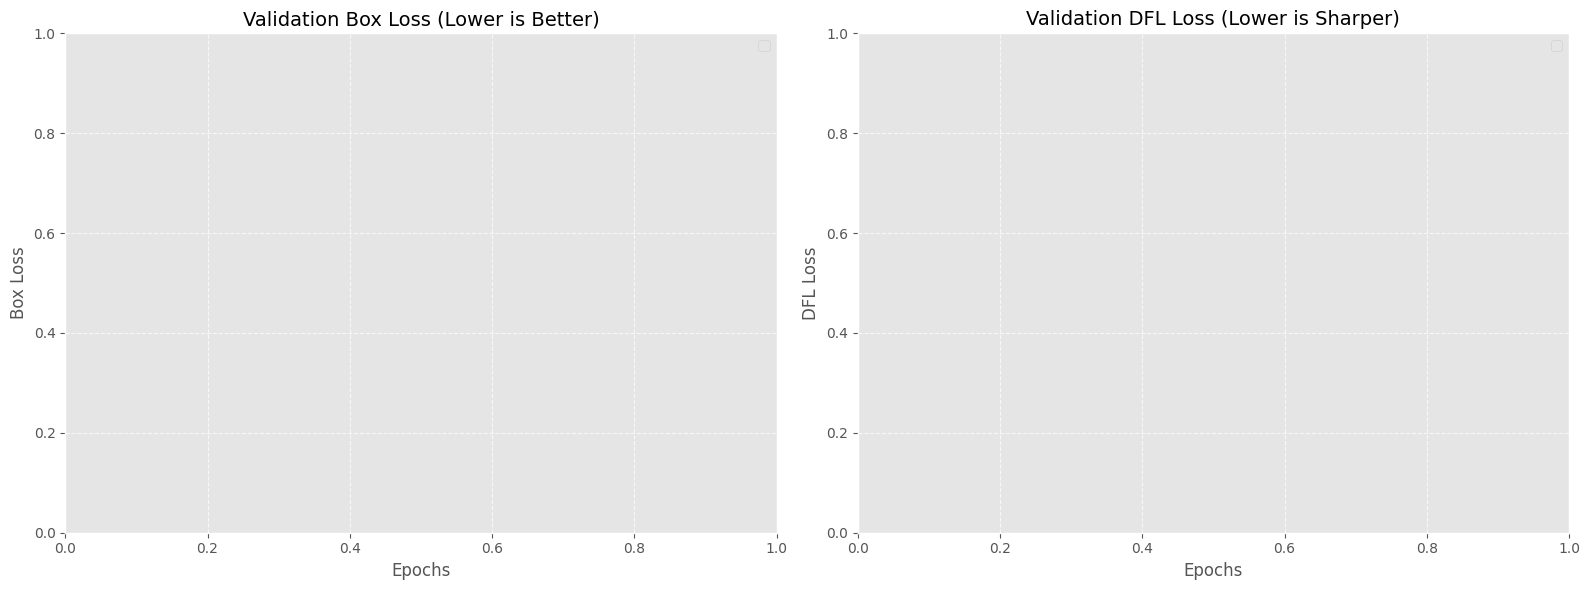


[Final Epoch Analysis]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 스타일 설정
plt.style.use('ggplot')

# 비교할 모델 선정 (사용자 경험 기반)
targets = {
    3: "Bad: Result 3 (Batch 32)",
    9: "Good: Result 9 (Batch 16)",
    12: "Good: Result 12 (Augmentation)"
}

dfs = {}
for idx, label in targets.items():
    filename = f"result{idx}.csv"
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        df.columns = [c.strip() for c in df.columns]
        dfs[label] = df

# 그래프 그리기 (2개의 서브플롯)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Validation Box Loss 비교 (낮을수록 물체 위치를 정확히 파악)
for label, df in dfs.items():
    ax1.plot(df['epoch'], df['val/box_loss'], label=label, linewidth=2)
ax1.set_title("Validation Box Loss (Lower is Better)", fontsize=14)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Box Loss")
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Validation DFL Loss 비교 (낮을수록 박스 테두리가 선명함)
for label, df in dfs.items():
    ax2.plot(df['epoch'], df['val/dfl_loss'], label=label, linewidth=2)
ax2.set_title("Validation DFL Loss (Lower is Sharper)", fontsize=14)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("DFL Loss")
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("realtime_performance_analysis.png", dpi=300)
plt.show()

# 최종 Epoch 값 출력해서 비교
print("\n[Final Epoch Analysis]")
for label, df in dfs.items():
    print(f"{label}:")
    print(f"  - Box Loss: {df['val/box_loss'].iloc[-1]:.4f}")
    print(f"  - DFL Loss: {df['val/dfl_loss'].iloc[-1]:.4f}")

✅ 그래프가 저장되었습니다: /home/juyeong/yolo_train/train_vs_real_gap.png


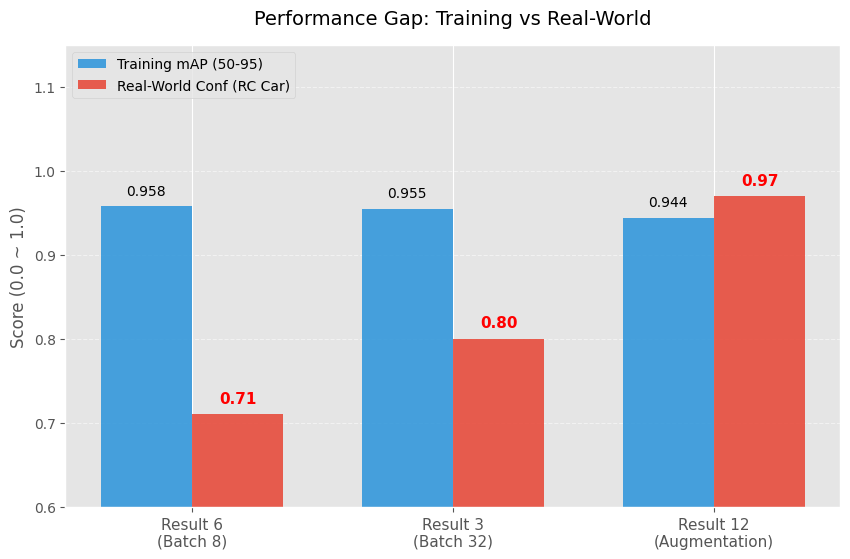

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. 데이터 정의 (PDF 및 실험 결과 수기 입력)
# 학습 성능(mAP)과 실전 체감(Confidence)의 괴리를 보여주는 데이터
data = {
    "Model": ["Result 6\n(Batch 8)", "Result 3\n(Batch 32)", "Result 12\n(Augmentation)"],
    "Training Score": [0.958, 0.955, 0.944],     # mAP 50-95 (학습 성적)
    "Real-World Score": [0.71, 0.80, 0.97]       # RC Car Confidence (실전 성적)
}

df = pd.DataFrame(data)

# 2. 그래프 그리기 설정
plt.figure(figsize=(10, 6))
x = range(len(df))
width = 0.35

# 3. 막대 그래프 생성 (파란색: 학습, 빨간색: 실전)
plt.bar([i - width/2 for i in x], df["Training Score"], width, label="Training mAP (50-95)", color='#3498db', alpha=0.9)
plt.bar([i + width/2 for i in x], df["Real-World Score"], width, label="Real-World Conf (RC Car)", color='#e74c3c', alpha=0.9)

# 4. 수치 텍스트 표시
for i in x:
    # 학습 점수 표시
    val_train = df["Training Score"][i]
    plt.text(i - width/2, val_train + 0.01, f"{val_train:.3f}", ha='center', va='bottom', fontsize=10)
    
    # 실전 점수 표시 (강조)
    val_real = df["Real-World Score"][i]
    plt.text(i + width/2, val_real + 0.01, f"{val_real:.2f}", ha='center', va='bottom', fontsize=11, fontweight='bold', color='red')

# 5. 축 및 레이블 설정
plt.xticks(x, df["Model"], fontsize=11)
plt.ylim(0.6, 1.15)  # 차이가 잘 보이도록 Y축 범위 조정
plt.ylabel("Score (0.0 ~ 1.0)", fontsize=12)
plt.title("Performance Gap: Training vs Real-World", fontsize=14, pad=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 6. 저장 및 출력 (가장 중요한 부분!)
save_path = "train_vs_real_gap.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✅ 그래프가 저장되었습니다: {os.path.abspath(save_path)}")

# 쥬피터 노트북이 아닌 경우 창이 안 뜰 수 있음
try:
    plt.show()
except Exception:
    pass

KeyError: 'mAP50-95'

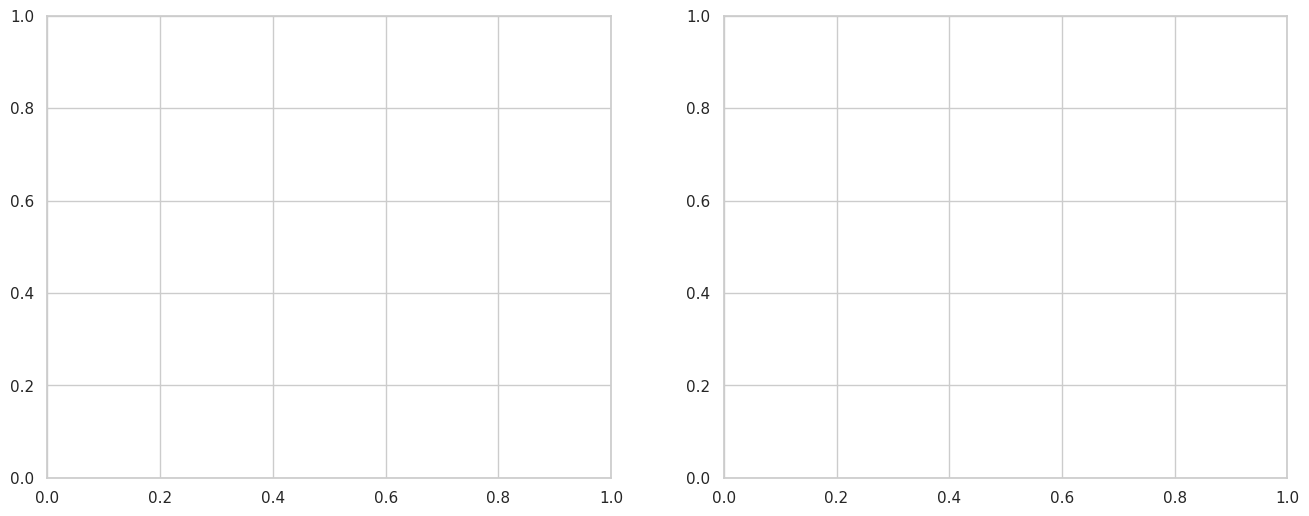

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 스타일 설정 (깔끔한 디자인)
sns.set_theme(style="whitegrid")

# 1. 데이터 정의
experiments = {
    2: "Baseline (Batch 16)",
    3: "Batch 32",
    6: "Batch 8",
    9: "Batch 16 (Run 2)",
    10: "Data +50 (Batch 16)",
    11: "Data +50 (Batch 10)",
    12: "Roboflow Aug",
    13: "Batch 10",
    15: "Epochs 200"
}

# 2. 데이터 취합
base_path = "."  # csv 파일 경로
summary_data = []

for idx, label in experiments.items():
    filename = f"result{idx}.csv"
    if os.path.exists(filename):
        try:
            df = pd.read_csv(filename)
            df.columns = [c.strip() for c in df.columns]
            
            # F1-Score 계산
            if 'metrics/precision(B)' in df.columns and 'metrics/recall(B)' in df.columns:
                p = df['metrics/precision(B)']
                r = df['metrics/recall(B)']
                df['metrics/F1-score(B)'] = 2 * (p * r) / (p + r + 1e-16)
            
            # 최고값 추출
            row = {
                "Model": f"#{idx} {label}",
                "mAP50-95": df['metrics/mAP50-95(B)'].max(),
                "mAP50": df['metrics/mAP50(B)'].max(),
                "F1-score": df['metrics/F1-score(B)'].max()
            }
            summary_data.append(row)
        except Exception:
            pass

df_summary = pd.DataFrame(summary_data)

# 3. 랭킹 막대 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 2개만 보여주기 (mAP50-95, F1)
metrics = ["mAP50-95", "F1-score"]
colors = ['#4c72b0', '#55a868']

for i, metric in enumerate(metrics):
    ax = axes[i]
    # 정렬 (높은 순)
    df_sorted = df_summary.sort_values(by=metric, ascending=True)
    
    # 가로 막대
    bars = ax.barh(df_sorted["Model"], df_sorted[metric], color=colors[i], alpha=0.8)
    
    # 값 표시
    for bar in bars:
        width = bar.get_width()
        ax.text(width * 1.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                va='center', fontweight='bold', fontsize=10)
        
    ax.set_title(f"Best {metric} Ranking", fontsize=14, fontweight='bold')
    ax.set_xlim(df_sorted[metric].min() * 0.98, df_sorted[metric].max() * 1.01) # 범위 줌인

plt.tight_layout()
plt.savefig("ranking_chart.png", dpi=300)
plt.show()